# K-Means Clustering using Iris Dataset

K-Means clustering aims to partition data into k clusters in a way that data points in the same cluster are similar and data points in the different clusters are farther apart.

K-Means clustering is unsupervised learning algorithm. Unsupervised learning algorithm is machine learning algorithms to analyze and cluster unlabeled datasets.

In this notebook we are going to cluster 'Iris Dataset'.

### 1. Importing libraries

In [36]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics, cluster
import matplotlib.pyplot as plt 

a. NumPy is a Python library used for working with arrays also mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.

b. Pandas python library is used for data manipulation and analysis.

c. Sklearn is simple and efficient library for predictive data analysis in python.

d. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

### 2. Reading the data

In [37]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns= iris.feature_names)

Reading iris data from sklearn dataset and creating Datafram.

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

### 3. Diving into the data

In [38]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Returns first n rows of Datafram. Default value is 5. You can give any number into head() function.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Print a concise summary of a Dataframe.

In [40]:
data.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Returns descriptive statistics. Default value for decribe() function is numeric.

### 4. Visualising the Data

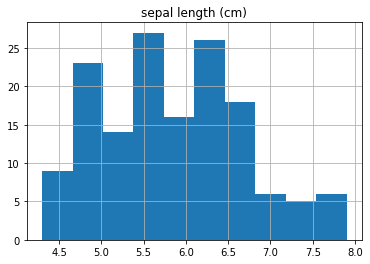

In [41]:
data.hist(column='sepal length (cm)')
plt.show()

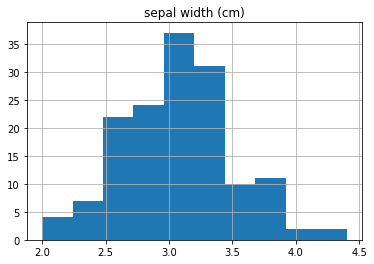

In [7]:
data.hist(column='sepal width (cm)')
plt.show()

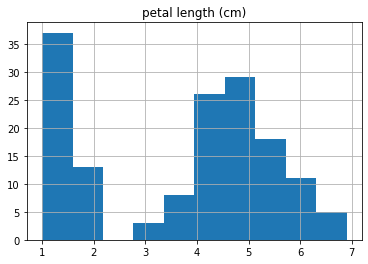

In [8]:
data.hist(column='petal length (cm)')
plt.show()

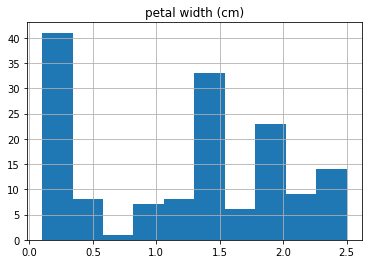

In [9]:
data.hist(column='petal width (cm)')
plt.show()

We have used hist plot to visualize each variable in the data. Hist plot can show how data is distributed within range.

### 5. Finding the optimum number of clusters

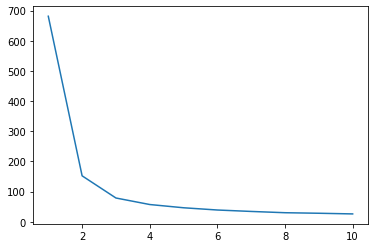

In [42]:
Centroid_list = []
No_of_clusters = range(1,11)

for i in No_of_clusters :
    kmeans = cluster.KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data.values)
    Centroid_list.append(kmeans.inertia_)
    
plt.plot(No_of_clusters,Centroid_list)
plt.show()

This is the "Elbow Curve Method". It's most widely used method to identify optimum number of clusters.

THe basic idea is for each K value, we calculate average distances to the centroid across all data points.

The curve looks like an elbow. When average distances to the centroid doesn't decrease significantly with every iteration, we can chooose optimum number of clusters. In the above plot, the elbow is at k=3.

### 6. Training and prediction

In [43]:
kmeans = cluster.KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
centroid = kmeans.fit_predict(data.values)

Here we simply chnaged n_cluster value to 3. In the next line storing prediction in the centroid variable.

In [34]:
print(centroid)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Simply printing centriod values.

### 7. Plotting prediction

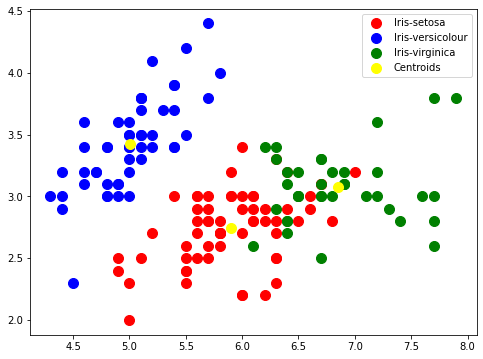

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(data.values[centroid == 0, 0], data.values[centroid == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data.values[centroid == 1, 0], data.values[centroid == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data.values[centroid == 2, 0], data.values[centroid == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

We can see clusters in blue, red and green colors. Yellow circles are representing cluster centers.